In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
import datetime 
import re
import operator

In [10]:
train = pd.read_csv('train_rm_json.csv')
test = pd.read_csv('test_rm_json.csv')

/Users/jacob/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jacob/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
full = pd.concat([train,test],axis=0,ignore_index=True)

In [12]:
full.columns

Index(['Unnamed: 0', 'channelGrouping', 'date', 'device.browser',
       'device.browserSize', 'device.browserVersion', 'device.deviceCategory',
       'device.flashVersion', 'device.isMobile', 'device.language',
       'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.screenColors',
       'device.screenResolution', 'fullVisitorId', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'sessionId',
       'socialEngagementType', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'totals.visits', 'trafficSo

In [41]:
full.shape

(1708337, 76)

In [13]:
print('Train unique visitor: ' + str(len(train.fullVisitorId.unique())))
print('Proportion: ' +  str(len(train.fullVisitorId.unique()) / len(train)))
print('Test unique visitor: ' + str(len(test.fullVisitorId.unique())))
print('Proportion: ' +  str(len(test.fullVisitorId.unique()) / len(test)))

Train unique visitor: 723803
Proportion: 0.8009744891014582
Test unique visitor: 650489
Proportion: 0.8083781956643851


Number of non-zero revenue:

In [14]:
len(train.loc[train['totals.transactionRevenue'].notnull(), ['totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue']])

11515

Relation between revenue and pagesviewed

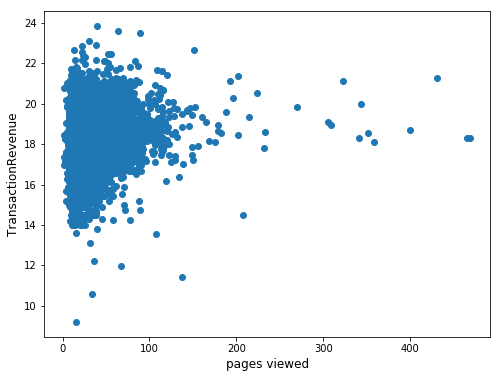

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(train['totals.pageviews'], np.log(train['totals.transactionRevenue']))
plt.xlabel('pages viewed', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

Drop constant columns

In [17]:
const_cols = [c for c in full.columns if full[c].nunique(dropna=False)==1 ]
const_cols

['device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'socialEngagementType',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [18]:
const_cols = const_cols + ['Unnamed: 0', 'trafficSource.campaignCode'] 
full = full.drop(columns = const_cols)

In [19]:
full.dtypes

channelGrouping                                  object
date                                              int64
device.browser                                   object
device.deviceCategory                            object
device.isMobile                                    bool
device.operatingSystem                           object
fullVisitorId                                    object
geoNetwork.city                                  object
geoNetwork.continent                             object
geoNetwork.country                               object
geoNetwork.metro                                 object
geoNetwork.networkDomain                         object
geoNetwork.region                                object
geoNetwork.subContinent                          object
sessionId                                        object
totals.bounces                                  float64
totals.hits                                       int64
totals.newVisits                                

In [20]:
full.head()

,channelGrouping,date,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,...,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,Chrome,desktop,False,Windows,1131660440785968503,Izmir,Asia,Turkey,...,NaN,(not set),NaN,(not provided),organic,NaN,google,1472830385,1,1472830385
1,Organic Search,20160902,Firefox,desktop,False,Macintosh,377306020877927890,not available in demo dataset,Oceania,Australia,...,NaN,(not set),NaN,(not provided),organic,NaN,google,1472880147,1,1472880147
2,Organic Search,20160902,Chrome,desktop,False,Windows,3895546263509774583,Madrid,Europe,Spain,...,NaN,(not set),NaN,(not provided),organic,NaN,google,1472865386,1,1472865386
3,Organic Search,20160902,UC Browser,desktop,False,Linux,4763447161404445595,not available in demo dataset,Asia,Indonesia,...,NaN,(not set),NaN,google + online,organic,NaN,google,1472881213,1,1472881213
4,Organic Search,20160902,Chrome,mobile,True,Android,27294437909732085,not available in demo dataset,Europe,United Kingdom,...,NaN,(not set),True,(not provided),organic,NaN,google,1472822600,2,1472822600


In [21]:
nunique = pd.Series([full[c].nunique() for c in full.columns], index = full.columns).sort_values(ascending=False)
nunique

sessionId                                       1706613
visitStartTime                                  1667423
visitId                                         1665802
fullVisitorId                                   1367992
trafficSource.adwordsClickInfo.gclId              59008
geoNetwork.networkDomain                          41982
trafficSource.keyword                              5392
totals.transactionRevenue                          5332
trafficSource.referralPath                         3196
geoNetwork.city                                     956
date                                                638
trafficSource.source                                500
geoNetwork.region                                   483
visitNumber                                         457
totals.hits                                         297
totals.pageviews                                    230
geoNetwork.country                                  228
device.browser                                  

# Explore and engineer 'date'

In [22]:
full['weekday'] = full['date'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d').weekday())
full['month'] = full['date'].apply(lambda x: int(str(x)[4:6]))

In [23]:
full['hour'] = full['visitStartTime'].apply(lambda x: datetime.datetime.fromtimestamp(x).isoformat()[11:13])

# device.browser

In [42]:
full['device.browser'].value_counts(normalize = True)

Chrome                      0.686665
Safari                      0.182730
Firefox                     0.037373
Internet Explorer           0.020765
Android Webview             0.020058
Edge                        0.012025
Samsung Internet            0.009244
Opera Mini                  0.008791
Safari (in-app)             0.008316
Opera                       0.005611
UC Browser                  0.003110
YaBrowser                   0.001782
Amazon Silk                 0.000859
Coc Coc                     0.000727
Android Browser             0.000551
Mozilla Compatible Agent    0.000388
MRCHROME                    0.000180
Maxthon                     0.000168
Puffin                      0.000147
BlackBerry                  0.000142
others                      0.000105
Nintendo Browser            0.000097
Nokia Browser               0.000056
Iron                        0.000023
osee2unifiedRelease         0.000016
SeaMonkey                   0.000015
Mozilla                     0.000013
L

In [25]:
browser = full['device.browser'].value_counts().index[0:30]
full['device.browser'] = full['device.browser'].apply(lambda x: x if x in browser else 'others')

# TrafficSource

'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'

In [26]:
traffic_col = ['trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source']
pd.Series([full[c].nunique(dropna=False ) for c in traffic_col], index = traffic_col).sort_values(ascending = False)

trafficSource.adwordsClickInfo.gclId            59009
trafficSource.keyword                            5393
trafficSource.referralPath                       3197
trafficSource.source                              500
trafficSource.adContent                            77
trafficSource.campaign                             35
trafficSource.adwordsClickInfo.page                12
trafficSource.medium                                7
trafficSource.adwordsClickInfo.slot                 4
trafficSource.adwordsClickInfo.adNetworkType        4
trafficSource.isTrueDirect                          2
trafficSource.adwordsClickInfo.isVideoAd            2
dtype: int64

# Check if the source is from awords click

In [27]:
full['from_adwords'] = full['trafficSource.adwordsClickInfo.gclId'].notnull()

# Transform traffic source to larger category

In [28]:
full['trafficSource.source'].unique()

array(['google', 'baidu', 'googleweblight.com', 'sites.google.com',
       'bing', 'siliconvalley.about.com', 'analytics.google.com',
       'Partners', '(direct)', 'mall.googleplex.com', 'google.com',
       'google.co.in', 'qiita.com', 'google.pl', 'mail.google.com',
       'hangouts.google.com', 'dealspotr.com', 'optimize.google.com',
       'arstechnica.com', 'dfa', 'docs.google.com', 'sashihara.jp',
       'google.gatewaycdi.com', 'phandroid.com', 'images.google',
       'youtube.com', 'l.facebook.com', 'facebook.com', 'quora.com',
       'm.facebook.com', 'reddit.com', 'google.co.jp', 'aol',
       'moma.corp.google.com', 'blog.golang.org', 'yahoo', 't.co',
       'nordic.businessinsider.com', 'duckduckgo.com', 'm.baidu.com',
       'tpc.googlesyndication.com', 'googleads.g.doubleclick.net',
       '0.shared.bow.cat2.ads-bow.vu.borg.google.com:9856',
       'online-metrics.com', 'cv.il3.ub.edu', 'gophergala.com',
       'plus.google.com', 's0.2mdn.net', 'keep.google.com',
       

In [29]:
def matchSource(source, source_lst):
    for word in source_lst:
        if word in source:
            return word
    return 'others'      

In [30]:
source_lst = ['google', 'youtube', 'bing', 'direct', 'Partner', 'facebook', 'amazon', 'yahoo' , 'baidu', 'sogou',
              'dfa', 'reddit', 'qiita', 'quora', 't.co', 'golang', 'dealspotr', 'away.vk', 'duckduckgo', 'jp', 'ask', 
             'lunametrics', 'phandroid', 'linkedin', 'outlook', 'tb.ask', '2mdn', 'seroundtable', 'messenger', 'search',
             'vk', 'github', 'businessinsider', 'edu', 'online-metrics', '(not set)', 'msn', 'wiki'] 
full['source_cate'] = full['trafficSource.source'].apply(matchSource, args = (source_lst,))

In [43]:
full['source_cate'].value_counts(normalize=True)

google             0.597178
youtube            0.192920
direct             0.159894
Partner            0.019277
facebook           0.007051
dfa                0.003924
baidu              0.003039
t.co               0.002480
reddit             0.002451
qiita              0.001990
bing               0.001977
quora              0.001775
yahoo              0.001700
golang             0.000809
dealspotr          0.000439
ask                0.000404
away.vk            0.000359
others             0.000356
duckduckgo         0.000250
jp                 0.000248
lunametrics        0.000217
phandroid          0.000184
edu                0.000149
search             0.000146
2mdn               0.000119
outlook            0.000085
seroundtable       0.000082
messenger          0.000080
online-metrics     0.000073
linkedin           0.000071
businessinsider    0.000057
vk                 0.000049
sogou              0.000046
(not set)          0.000041
github             0.000036
msn                0

In [32]:
full['trafficSource.keyword'].unique().tolist()

['(not provided)',
 'google + online',
 nan,
 'www google store',
 'Google store',
 '6qEhsCssdK0z36ri',
 'buy google souvenirs',
 'shop shirts',
 'google t shirt',
 'google t-shirt',
 'hood pink',
 '(Remarketing/Content targeting)',
 'youtube',
 'youtube player t shirt',
 '1hZbAqLCbjwfgOH7',
 'https://www.googlemerchandisestore.com/shop.axd/Home',
 '+google +store',
 'google merchandice',
 'google clothes shopping',
 'Arts & Entertainment',
 'https://www.googlemerchandisestore.com/Google+Redesign/Fun/Pop-a-Point+Crayon.axd',
 'Google mechendiser',
 'blue lava lamp',
 'google',
 'google clothing',
 '(content targeting)',
 '(User vertical targeting)',
 '(automatic matching)',
 'how to purchase shop on google',
 'Google T',
 'google bag',
 'google apparel shop',
 'Bag',
 'Google t shart',
 'Youtube.doratvplay.stor',
 'wwe google',
 'google australia',
 'google shirts online',
 'google store.com',
 'Shop on Google',
 'google nyc address',
 'how to get free google merchandise',
 'google sto

In [33]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
tokenizer = RegexpTokenizer(r'\w+')
keyword_dict = dict()
    
for i in range(len(train)):
    # Remove the stopwords
    line = train['trafficSource.keyword'][i]
    revenue = train['totals.transactionRevenue'][i]
    if type(line) == float:
        continue
    word_tokens = tokenizer.tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    ps = PorterStemmer()
    for word in filtered_sentence:
        word = ps.stem(word.lower())
        if word not in keyword_dict:
            keyword_dict[word] = {'pos': 0, 'neg': 0, 'revenue': 0}
        if np.isnan(revenue):
            keyword_dict[word]['neg'] += 1
        else: 
            keyword_dict[word]['pos'] += 1
            keyword_dict[word]['revenue'] += revenue

In [34]:
word_revenue = dict.fromkeys(keyword_dict, 0)
for key in word_revenue: word_revenue[key] = keyword_dict[key]['revenue']
# import operator
sorted_word = sorted(word_revenue.items(), key=operator.itemgetter(1), reverse = True)
sorted_word

[('provid', 322244970000.0),
 ('6qehscssdk0z36ri', 22982900000.0),
 ('googl', 15859850000.0),
 ('merchandis', 15142670000.0),
 ('store', 6226150000.0),
 ('1hzbaqlcbjwfgoh7', 3840740000.0),
 ('remarket', 606690000.0),
 ('content', 606690000.0),
 ('target', 606690000.0),
 ('googlesupport', 416800000.0),
 ('1x4me6zknv0zg', 308910000.0),
 ('jv', 308910000.0),
 ('gear', 224240000.0),
 ('googlemerchandisestor', 216430000.0),
 ('youtub', 149850000.0),
 ('merch', 127930000.0),
 ('apparel', 91970000.0),
 ('category_l1', 83420000.0),
 ('166', 83420000.0),
 ('tshirt', 77820000.0),
 ('men', 51990000.0),
 ('hoodi', 51990000.0),
 ('pullov', 51990000.0),
 ('swag', 34460000.0),
 ('tube', 29980000.0),
 ('cap', 29980000.0),
 ('trucker', 29980000.0),
 ('item', 26400000.0),
 ('sale', 26400000.0),
 ('shirt', 23490000.0),
 ('automat', 22950000.0),
 ('match', 22950000.0),
 ('sticker', 22440000.0),
 ('mug', 14950000.0),
 ('coffe', 14950000.0),
 ('onlin', 0),
 ('www', 0),
 ('buy', 0),
 ('souvenir', 0),
 ('shop

In [35]:
revenue_words = [word for word in word_revenue if word_revenue[word] > 0]
for word in revenue_words:
    print(keyword_dict[word])

{'pos': 3387, 'neg': 362976, 'revenue': 322244970000.0}
{'pos': 142, 'neg': 10423, 'revenue': 15859850000.0}
{'pos': 73, 'neg': 5428, 'revenue': 6226150000.0}
{'pos': 261, 'neg': 11242, 'revenue': 22982900000.0}
{'pos': 1, 'neg': 1183, 'revenue': 23490000.0}
{'pos': 9, 'neg': 2289, 'revenue': 606690000.0}
{'pos': 9, 'neg': 2588, 'revenue': 606690000.0}
{'pos': 9, 'neg': 3078, 'revenue': 606690000.0}
{'pos': 5, 'neg': 2904, 'revenue': 149850000.0}
{'pos': 56, 'neg': 2208, 'revenue': 3840740000.0}
{'pos': 1, 'neg': 315, 'revenue': 216430000.0}
{'pos': 1, 'neg': 426, 'revenue': 22950000.0}
{'pos': 1, 'neg': 426, 'revenue': 22950000.0}
{'pos': 2, 'neg': 83, 'revenue': 91970000.0}
{'pos': 122, 'neg': 5589, 'revenue': 15142670000.0}
{'pos': 1, 'neg': 352, 'revenue': 29980000.0}
{'pos': 2, 'neg': 127, 'revenue': 22440000.0}
{'pos': 4, 'neg': 676, 'revenue': 127930000.0}
{'pos': 6, 'neg': 461, 'revenue': 308910000.0}
{'pos': 6, 'neg': 461, 'revenue': 308910000.0}
{'pos': 1, 'neg': 231, 'revenu

# Transform keyword with revenue to columns? one column?

In [36]:
for word in revenue_words:
    full[word] = full['trafficSource.keyword'].apply(lambda x: word in str(x))

In [37]:
full['have_revenue_words'] = full[revenue_words].sum(axis = 1)

# trafficSource.referralPath                       

# Save featured data

In [38]:
train_fe = full[0:len(train)]
test_fe = full[len(train):len(full)]

In [39]:
train_fe.to_csv('train_fe_1004.csv')
test_fe.to_csv('test_fe_1004.csv')

# Save complex columns for later:
trafficSource.referralPath


In [40]:
train_fe.columns

Index(['channelGrouping', 'date', 'device.browser', 'device.deviceCategory',
       'device.isMobile', 'device.operatingSystem', 'fullVisitorId',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'sessionId', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'visitId', 'visitNumber', 'visitStartTime',
       'weekday', 'month', 'hour', 'from_adword